In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv(r'C:\Users\Nandhini R\OneDrive\Desktop\Mini Project\Breast Cancer\data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
#Data Preprocessing
data.drop('id',axis=1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Binarizing the target variable:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [6]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Split the features and target variable
X = data.iloc[:, 2:].values
z = data['diagnosis']

# Convert list to array
y = np.array(z)

In [8]:
X

array([[1.038e+01, 1.228e+02, 1.001e+03, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [1.777e+01, 1.329e+02, 1.326e+03, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [2.125e+01, 1.300e+02, 1.203e+03, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [2.808e+01, 1.083e+02, 8.581e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.933e+01, 1.401e+02, 1.265e+03, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [2.454e+01, 4.792e+01, 1.810e+02, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print ('Shape of training set : %i || Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]) )

Shape of training set : 455 || Shape of test set : 114


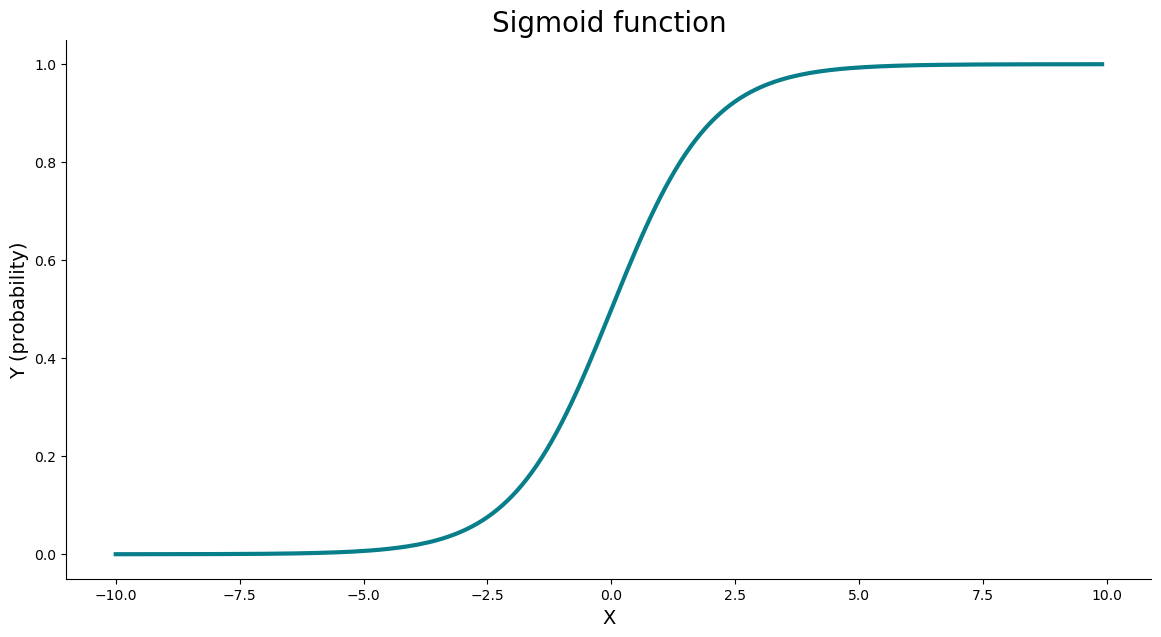

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-10, 10, 0.1)
ys = [sigmoid(x) for x in xs]

plt.plot(xs, ys, c='#087E8B', lw=3)
plt.title('Sigmoid function', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y (probability)', size=14)
plt.show()

In [13]:
def binary_cross_entropy(y, y_hat):
    def safe_log(x): return 0 if x == 0 else np.log(x)
    
    total = 0
    for curr_y, curr_y_hat in zip(y, y_hat):
        total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
    return - total / len(y)


print(binary_cross_entropy(y=[1, 0], y_hat=[0.9, 0.1]))
print(binary_cross_entropy(y=[1, 0], y_hat=[0.1, 0.9]))

0.10536051565782628
2.302585092994046


In [14]:
class LogisticRegression:

    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        
    @staticmethod
    def _sigmoid(x):
        '''
        Private method, used to pass results of the line equation through the sigmoid function.
        
        :param x: float, prediction made by the line equation
        :return: float
        '''
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    @staticmethod
    def _binary_cross_entropy(y, y_hat):
        '''
        Private method, used to calculate binary cross entropy value between actual classes 
        and predicted probabilities.
        
        :param y: array, true class labels
        :param y_hat: array, predicted probabilities
        :return: float
        '''
        def safe_log(x): 
            return 0 if x == 0 else np.log(x)
        total = 0
        for curr_y, curr_y_hat in zip(y, y_hat):
            total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
        return - total / len(y)
        
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the logistic regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize coefficients
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            probability = self._sigmoid(linear_pred)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (probability - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(probability - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
    def predict_proba(self, X):
        '''
        Calculates prediction probabilities for a given threshold using the line equation 
        passed through the sigmoid function.
        
        :param X: array, features
        :return: array, prediction probabilities
        '''
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        '''
        Makes predictions using the line equation passed through the sigmoid function.
        
        :param X: array, features
        :param threshold: float, classification threshold
        :return: array, predictions
        '''
        probabilities = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in probabilities]

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

In [17]:
preds = model.predict(X_test)

In [18]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.8596491228070176

In [19]:
#K-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Assume X and y are the data and labels
k = 10  # number of folds
kf = KFold(n_splits=k)
i = 0

scores = []
for train_idx, test_idx in kf.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    i += 1
    print("N = " + str(i) + " :: Score = " + str(score))

average_score = sum(scores) / len(scores)
print(f"Average accuracy score: {average_score}")
print("The mean accuracy with 10 fold cross validation is %s" % round(average_score * 100, 2))


N = 1 :: Score = 0.7543859649122807
N = 2 :: Score = 0.9473684210526315
N = 3 :: Score = 0.8245614035087719
N = 4 :: Score = 0.8421052631578947
N = 5 :: Score = 0.9824561403508771
N = 6 :: Score = 0.9298245614035088
N = 7 :: Score = 0.8771929824561403
N = 8 :: Score = 0.9824561403508771
N = 9 :: Score = 0.8771929824561403
N = 10 :: Score = 0.875
Average accuracy score: 0.8892543859649121
The mean accuracy with 10 fold cross validation is 88.93
